Exemplo de fato que pode ser extraído de conjunto de dados: deseja-se verificar os salários anuais de funcionarios de determinada empresa (R$) com base no tempo de experiência (anos). É fornecido um conjunto de dados (pode ser de uma planilha, um formulário impresso, o resultado de extração (consulta) no BD da empresa etc.) os quais são tabelados como TUPLAS:

In [ ]:
salarios_e_tempoExp = [(83000, 8.7), (88000, 8.1),
                      (48000, 0.7), (76000, 6),
                      (69000, 6.5), (76000, 7.5),
                      (60000, 2.5), (83000, 10),
                      (48000, 1.9), (63000, 4.2)]

1) O primeiro passo será traçar um gráfico de dispersão, que é uma forma interessante de verificar o relacionamento entre dois pares de conjuntos de dados

<function matplotlib.pyplot.show>

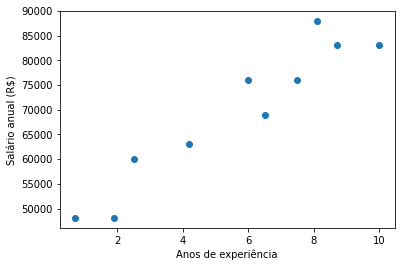

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

salarios = []
tempo = []
for s, t in salarios_e_tempoExp:
    salarios.append(s)
    tempo.append(t)
plt.scatter(tempo, salarios)
plt.xlabel('Anos de experiência')
plt.ylabel('Salário anual (R$)')
plt.show

Naturalmente, fica claro que os que possuem mais experiência tendem a receber mais. Uma ideia seria analisar a média salarial para cada tempo de experiência. Como no conjunto específico não há repetição de anos, não irá ajudar, mas fica aqui o código no caso de conjuntos variados:

In [ ]:
from collections import defaultdict
salario_por_anosExp = defaultdict(list)
for s, t in salarios_e_tempoExp:
    salario_por_anosExp[t].append(s)
# as chaves são os anos, cada valor é a média salário para aquele ano
salario_medio_por_anoExp = {
    t : sum(s) / len(s)
    for t, s in salario_por_anosExp.items()
}
salario_medio_por_anoExp

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

Vamos então criar classes para agrupar os casos por anos de Experiência, por exemplo, menos que 2, entre 2 e 5, mais que 5

In [ ]:
def agrupaAnosExp(tempo):
    if tempo < 2:
        return 'menos que 2'
    elif tempo < 5:
        return 'entre 2 e 5'
    else:
        return 'mais que 5'
# o grupo junta os salarios para cada agrupamento
# as chaves são agrupamentos dos casos, os valores são as listas dos salários para aquele agrupamento

salario_por_anosExp_agrupamento = defaultdict(list)
for s, t in salarios_e_tempoExp:
    grupo = agrupaAnosExp(t)
    salario_por_anosExp_agrupamento[grupo].append(s)

# e assim pode-se calcular a média salarial para cada grupo

salario_medio_por_grupo = {
    grupo : sum(salarios) / len(salarios)
    for grupo, salarios in salario_por_anosExp_agrupamento.items() #itera no dicionario grupo: salario
}

salario_medio_por_grupo

{'entre 2 e 5': 61500.0,
 'mais que 5': 79166.66666666667,
 'menos que 2': 48000.0}

Ou seja, infere-se que funcionários com mais de 5 anos de experiência recebem 65% a mais que os que possuem pouca ou nenhuma experiência. Já é alguma informação interessante, mas com técnicas de modelagem simples, como regressão, poderemos tentar entender o efeito do salário em média, ao ter um ano adicional de experiência, e ainda permite fazer "previsões" de salários para tempos de experiência não registrados.

In [ ]:
((79166.67-48000) / 48000)*100

64.9305625